# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (4)

**25/09/2023**

# `Alejandro Sánchez Monzón`

In [128]:
# Esta celda suele estar en todos los notebooks que hagan análisis o tratamientos de datos
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

---

### **`Ejercicio 4.1`**

**`4.1.1`** Crea un gráfico con puntos rojos que visualice el valor de cada número **elevado al cubo** (elevar cada número a la tercera potencia) para `101` números repartidos de forma equidistantes entre `0` y `10` (_inclusive_).

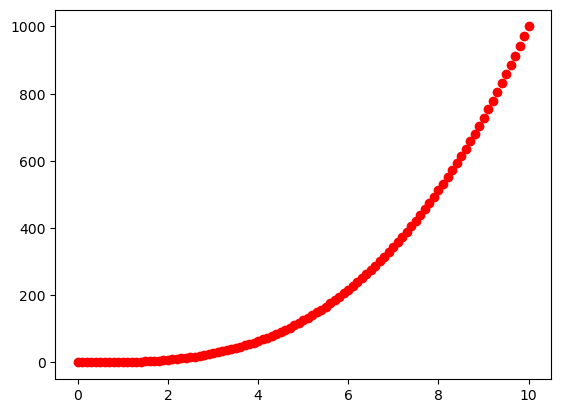

In [129]:
## Solución
# Ejercicio 4.1.1
X = np.linspace(0, 10, 101)
elevado = np.power(X, 3)

plt.scatter(X, elevado, color="red")

---

In [130]:
import numpy as np
import pandas as pd

### **`Ejercicio 4.2`**

**`4.2.1`** Define una función genérica usando el método `lambda` para convertir un array a una pandas series con valores enteros.    
**`4.2.2`** Aplica la función definida en el paso anterior sobre estos datos: `[10, True, 8.00, False, 8, 10]`  
**`4.2.3`** Consulta la siguiente información respecto a la serie creada en el paso anterior:
- valores de la serie
- índices de la serie
- tipo de datos que contiene la serie
- número de bits que ocupa en la memoria la serie  
 
**`4.2.4`** Genera un DataFrame con una columna que se llame `'ej_42'`a partir de la serie.

In [131]:
## Solución
# Ejercicio 4.2.1
funcion = lambda a : pd.Series(a, dtype="int")

In [132]:
## Solución
# Ejercicio 4.2.2
lista = [10, True, 8.00, False, 8, 10]

serie = funcion(lista)
serie

0    10
1     1
2     8
3     0
4     8
5    10
dtype: int32

In [133]:
## Solución
# Ejercicio 4.2.3
print("valores:", serie.values)
print("indices:", serie.index)
print("tipos:", type(serie.values))
print("bits:", serie.nbytes)

valores: [10  1  8  0  8 10]
indices: RangeIndex(start=0, stop=6, step=1)
tipos: <class 'numpy.ndarray'>
bits: 24


In [134]:
## Solución
# Ejercicio 4.2.4
df_42 = pd.DataFrame(serie, columns=['ej_42'])
df_42

,ej_42
0,10
1,1
2,8
3,0
4,8
5,10


---

### **`Ejercicio 4.3`**

Cargamos el Dataset de [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) que contiene datos del consumo de combustible de diversos modelos de coches. 

**`4.3.1`** ¿Qué coche pesa más de 5000 kg?    
**`4.3.2`** ¿Cuál es el número de cilindros más frecuente en los coches que son del año 76?  
**`4.3.3`** Compara el consumo medio de los coches fabricados en el año 70 con el consumo de los fabricados en el año 79 y calcula la diferencia.    
**`4.3.4`** Identifica las variables que contienen valores nulos (missing values) en caso de que haya alguna.    
**`4.3.5`** Crea un _DataFrame_ con los modelos con 6 o más cilindros, que pesen más de 4000 kg y consumen menos o igual que 10 galón por milla, filtrando el dataset original.


In [135]:
# Descargar los datos desde la página de UCI

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cilindros', 'desplazamiento','potencia',
            'peso', 'aceleración', 'año', 'origen', 'nombre'],
            na_values='?')

# El DataFrame que se carga
mpg_data

,mpg,cilindros,desplazamiento,potencia,peso,aceleración,año,origen,nombre
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [136]:
## Solución
# Ejercicio 4.3.1
mpg_data[mpg_data['peso'] > 5000]

,mpg,cilindros,desplazamiento,potencia,peso,aceleración,año,origen,nombre
44,13.0,8,400.0,175.0,5140.0,12.0,71,1,pontiac safari (sw)


In [137]:
## Solución
# Ejercicio 4.3.2
mpg_data[mpg_data['año'] == 76]['cilindros'].mode()[0]


4

In [138]:
## Solución
# Ejercicio 4.3.3
coches_70 = mpg_data[mpg_data['año'] == 70]['mpg'].mean()
coches_79 = mpg_data[mpg_data['año'] == 79]['mpg'].mean()

print('diferencia:', coches_70 - coches_79)

diferencia: -7.403448275862058


In [139]:
## Solución
# Ejercicio 4.3.4
variables_nulas = mpg_data.isna().sum()
print(variables_nulas)

for columna in mpg_data.columns:
    if variables_nulas[columna] > 0:
        print("\n columna con nulos:", columna)

mpg               0
cilindros         0
desplazamiento    0
potencia          6
peso              0
aceleración       0
año               0
origen            0
nombre            0
dtype: int64

 columna con nulos: potencia


In [140]:
## Solución
# Ejercicio 4.3.5
coches_6_cilindros = mpg_data[mpg_data['cilindros'] >= 6]
coches_pesados = coches_6_cilindros[coches_6_cilindros['peso'] > 4000]
coches_eficientes = coches_pesados[coches_pesados['mpg'] <= 10]

coches_eficientes

,mpg,cilindros,desplazamiento,potencia,peso,aceleración,año,origen,nombre
25,10.0,8,360.0,215.0,4615.0,14.0,70,1,ford f250
26,10.0,8,307.0,200.0,4376.0,15.0,70,1,chevy c20
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d


---

### **`Ejercicio 4.4`**

**`4.4.1`** A continuación vienen dos tablas que corresponden a número de aportaciones (_pull request_) de cada desarrollador de un equipo de análisis de datos en diferentes versiones liberadas (_Released versions_) de una aplicación corporativa . Concatena de forma básica los dos _DataFrames_ y calcula el número de filas de la tabla concatenada.  
 
**`4.4.2`** Realiza un merge con la unión de los dos _DataFrames_ y calcula el número de filas de la tabla resultante.  

**`4.4.3`** Realiza un merge con la intersección de los dos _DataFrames_ y calcula el número de filas de la tabla resultante.  
 
**`4.4.4`** Volviendo al dataset de "**Auto-MPG**" usado en el `ejercicio 4.3`, genera de nuevo el DataFrame y después saca las medias de cada variable por año.  
 
**`4.4.5`** Dibuja la evolución del peso medio de los coches a lo largo de los años, y analiza su tendencia.

In [141]:
### Ejercicio 4.4.1

analistas1 = pd.DataFrame([["Sara",4,3,8],["Manuel",2,7,3],["Pablo",2,6,4],["Antonio",1,9,6]], columns=["Name","B","C", "D"])

analistas2 = pd.DataFrame([["Claudia",6,3],["Luis",10,7],["Sara",7,11],["Pablo",12,14]], columns=["Name","F","G"])

display(analistas1)
display(analistas2)


,Name,B,C,D
0,Sara,4,3,8
1,Manuel,2,7,3
2,Pablo,2,6,4
3,Antonio,1,9,6


,Name,F,G
0,Claudia,6,3
1,Luis,10,7
2,Sara,7,11
3,Pablo,12,14


In [142]:
## Solución
# Ejercicio 4.4.1
df_analistas = pd.concat([analistas1, analistas2])

print("número de filas:", df_analistas.shape[0])

número de filas: 8


In [143]:
## Solución
# Ejercicio 4.4.2
df_analistas_2 = pd.merge(analistas1, analistas2, how="inner")

print("número de filas:", df_analistas_2.shape[0])

número de filas: 2


In [144]:
## Solución
# Ejercicio 4.4.3
df_analistas_3 = pd.merge(analistas1, analistas2, how="outer")

print("número de filas:", df_analistas_3.shape[0])

número de filas: 6


In [145]:
### Ejercicio 4.4.4

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cilindros', 'desplazamiento','potencia',
            'peso', 'aceleración', 'año', 'origen', 'nombre'],
            na_values='?')

# El DataFrame que se carga
mpg_data

,mpg,cilindros,desplazamiento,potencia,peso,aceleración,año,origen,nombre
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [146]:
## Solución
# Ejercicio 4.4.4
mpg_data.groupby('año').mean()

C:\Users\aleja\AppData\Local\Temp\ipykernel_12372\3509415863.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpg_data.groupby('año').mean()


,mpg,cilindros,desplazamiento,potencia,peso,aceleración,origen
año,,,,,,,
70,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276,1.310345
71,21.250000,5.571429,209.750000,107.037037,2995.428571,15.142857,1.428571
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000,1.535714
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500,1.375000
74,22.703704,5.259259,171.740741,94.230769,2877.925926,16.203704,1.666667
75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000,1.466667
76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176,1.470588
77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714,1.571429
78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556,1.611111


<Axes: xlabel='año'>

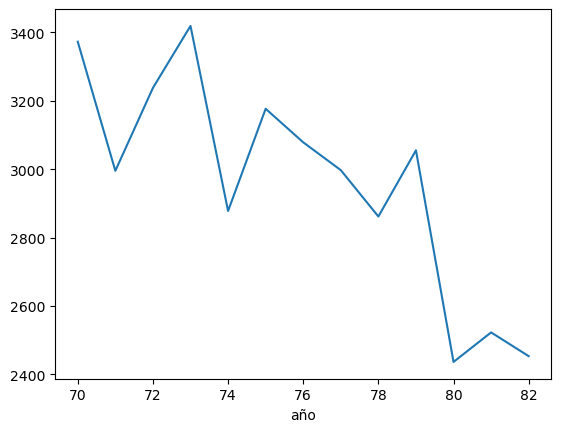

In [147]:
## Solución
# Ejercicio 4.4.5
mpg_data.groupby('año')['peso'].mean().plot() # Tiende a disminuir el peso de los coches con los años.